<a href="https://colab.research.google.com/github/dayeong918/pdm011/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


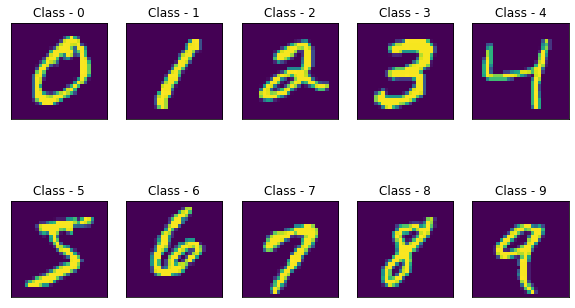

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [5]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(8) 

In [6]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [13]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [14]:
c1f2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

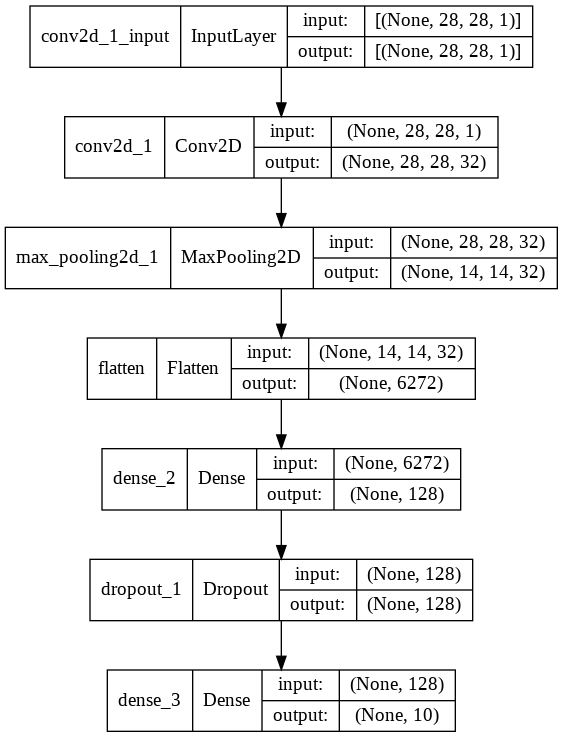

In [15]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [16]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

# ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible

Epoch 1/20
600/600 [==============================] - 13s 8ms/step - loss: 0.2245 - accuracy: 0.9349 - val_loss: 0.0724 - val_accuracy: 0.9769
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0747 - accuracy: 0.9776 - val_loss: 0.0513 - val_accuracy: 0.9842
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.0456 - val_accuracy: 0.9847
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0376 - val_accuracy: 0.9873
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.0370 - val_accuracy: 0.9871
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch

In [17]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9886


[0.045652132481336594, 0.9886000156402588]

---

## **CNN1 + FCN3**

In [18]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [25]:
c1f3 = tf.keras.models.Sequential([ 
    
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c1f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [27]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3227 - accuracy: 0.9042
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1444 - accuracy: 0.9565
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1068 - accuracy: 0.9679
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0848 - accuracy: 0.9737
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9771
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0629 - accuracy: 0.9803
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0564 - accuracy: 0.9812
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0516 - accuracy: 0.9822
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0455 - accuracy: 0.9845
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0436 - accuracy: 0.9855

In [28]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9819


[0.0689157247543335, 0.9818999767303467]

## **CNN2 + FCN2**

In [29]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [33]:
c2f2 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [34]:
c2f2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [35]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4233 - accuracy: 0.8715
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1714 - accuracy: 0.9512
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1288 - accuracy: 0.9632
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1047 - accuracy: 0.9695
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0921 - accuracy: 0.9723
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0777 - accuracy: 0.9769
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0710 - accuracy: 0.9788
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0596 - accuracy: 0.9818
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0557 - accuracy: 0.9836

In [36]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9819


[0.07314037531614304, 0.9818999767303467]

## **CNN2 + FCN3**

In [37]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [38]:
c2f3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [39]:
c2f3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)               

In [40]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.5934 - accuracy: 0.8191
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2292 - accuracy: 0.9406
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1763 - accuracy: 0.9555
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1448 - accuracy: 0.9637
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1302 - accuracy: 0.9673
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1077 - accuracy: 0.9721
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1009 - accuracy: 0.9735
Epoch 8/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0890 - accuracy: 0.9761
Epoch 9/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0837 - accuracy: 0.9782
Epoch 10/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0819 - accuracy: 0.9787

In [41]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9806


[0.08621615916490555, 0.9805999994277954]

# **[DIY] Hidden layer에 따른 정확도**

In [43]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9886


[0.045652132481336594, 0.9886000156402588]

In [44]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9819


[0.0689157247543335, 0.9818999767303467]

In [45]:
# Try another method!!
fcn_result = [[0.08733399957418442, 0.9789999723434448], 
 [0.07378004491329193, 0.9837999939918518], 
 [0.06836291402578354, 0.984000027179718], 
 [0.08842429518699646, 0.9807000160217285]]

In [46]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9789999723434448, 0.9837999939918518, 0.984000027179718, 0.9807000160217285]

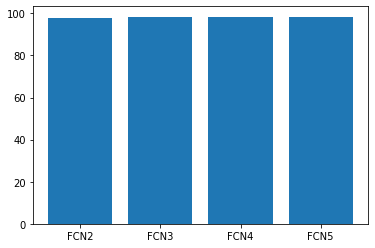

In [47]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [48]:
c2f2.save('c2f2_best.hdf5')

In [50]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9819


[0.07314041256904602, 0.9818999767303467]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [51]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0655 - accuracy: 0.9803 - val_loss: 0.0773 - val_accuracy: 0.9781
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0751 - val_accuracy: 0.9803
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0877 - val_accuracy: 0.9785
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0706 - val_accuracy: 0.9825
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0462 - accuracy: 0.9862 - val_loss: 0.0763 - val_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0740 - val_accuracy: 0.9835
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9871 - val_loss: 0.0750 - val_accuracy

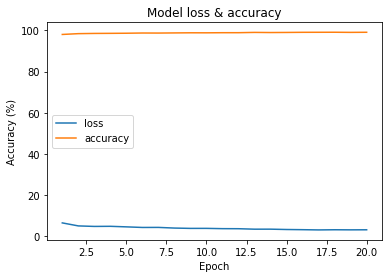

In [53]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

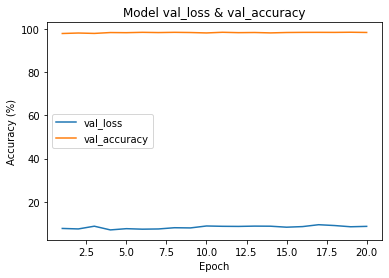

In [56]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

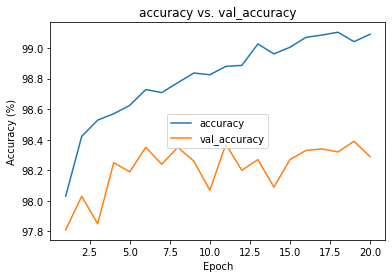

In [57]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here!

In [58]:
c2f3.save('c2f3_best.hdf5')

In [61]:
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0862 - accuracy: 0.9806


[0.08621615916490555, 0.9805999994277954]

In [63]:
np.random.seed(1234)
tf.random.set_seed(1234)

In [72]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),
           kernel_size=(3,3),strides=(1,1),
           filters= 64, padding='same',
           activation='relu'), 
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),
           filters= 32, padding='same',
           activation='relu'),  
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    # f3
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [73]:
c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
hist = c2f2.fit(X_train, y_train,
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0826 - val_accuracy: 0.9860
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0840 - val_accuracy: 0.9850
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0921 - val_accuracy: 0.9852
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0923 - val_accuracy: 0.9853
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0899 - val_accuracy: 0.9852
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0935 - val_accuracy: 0.9850
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0889 - val_accuracy: 0.9848
Epoch 

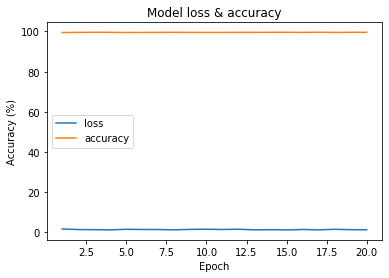

In [77]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')
plt.show()

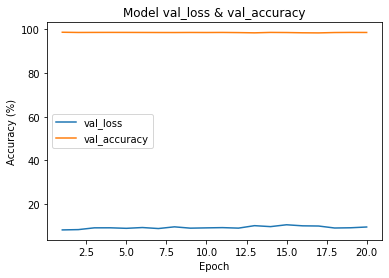

In [75]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

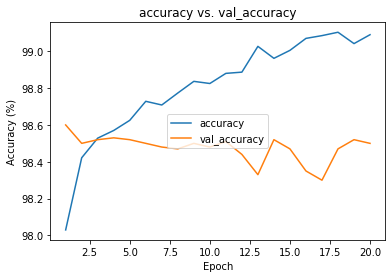

In [76]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
plt.show()